In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, learning_curve
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('data/train_merged.csv')
df.head()

,id,area_code,outage_duration,transit_server_type,log_report_type,volume,broadband_type,outage_type
0,13366,area_415,1,transit_server_type_35,log_report_type_312,1,broadband_type_2,outage_type_4
1,6783,area_474,0,transit_server_type_35,log_report_type_312,2,broadband_type_2,outage_type_2
2,6783,area_474,0,transit_server_type_35,log_report_type_233,1,broadband_type_2,outage_type_2
3,6783,area_474,0,transit_server_type_35,log_report_type_232,1,broadband_type_2,outage_type_2
4,6783,area_474,0,transit_server_type_35,log_report_type_315,2,broadband_type_2,outage_type_2


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48973 entries, 0 to 48972
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   48973 non-null  int64 
 1   area_code            48973 non-null  object
 2   outage_duration      48973 non-null  int64 
 3   transit_server_type  48973 non-null  object
 4   log_report_type      48973 non-null  object
 5   volume               48973 non-null  int64 
 6   broadband_type       48973 non-null  object
 7   outage_type          48973 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.0+ MB


,id,outage_duration,volume
count,48973.000000,48973.000000,48973.000000
mean,9141.189084,0.539889,8.605742
std,5390.273600,0.725738,23.487812
min,1.000000,0.000000,1.000000
25%,4493.000000,0.000000,1.000000
50%,9107.000000,0.000000,2.000000
75%,13663.000000,1.000000,6.000000
max,18550.000000,2.000000,877.000000


In [4]:

#Taking deep copy
df1 = df.copy(deep = True)

In [5]:

#No duplicates
df1[df1.duplicated(keep = 'last')]

,id,area_code,outage_duration,transit_server_type,log_report_type,volume,broadband_type,outage_type


In [6]:
df1.isnull().sum()

id                     0
area_code              0
outage_duration        0
transit_server_type    0
log_report_type        0
volume                 0
broadband_type         0
outage_type            0
dtype: int64

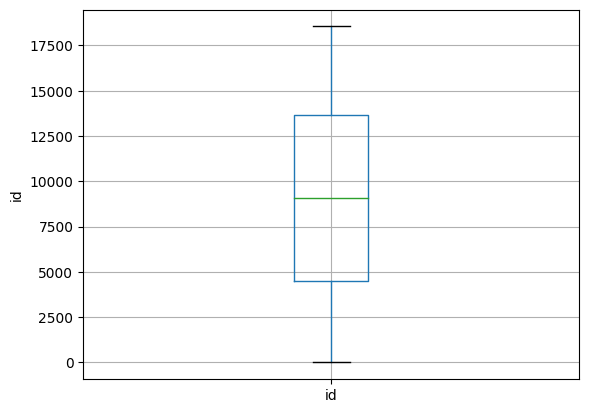

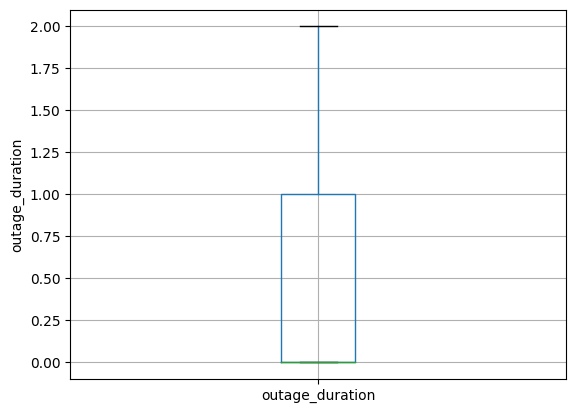

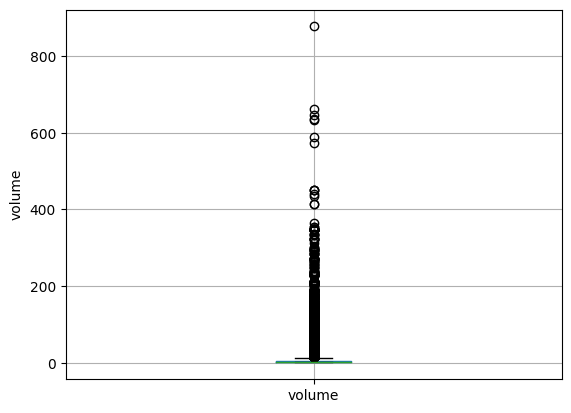

In [7]:
#Outlier plotting
num_feat = [cname for cname in df1.columns if df1[cname].dtype in ['int64', 'float64']]

for i in num_feat:
    df1.boxplot(column = i)
    plt.ylabel(i)
    plt.show()

/tmp/ipykernel_21819/578385505.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j])


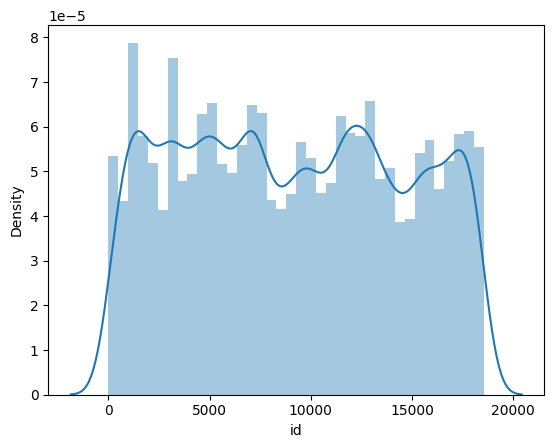

/tmp/ipykernel_21819/578385505.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j])


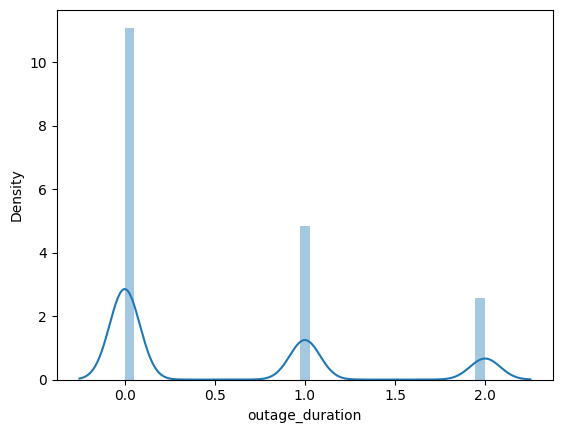

/tmp/ipykernel_21819/578385505.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[j])


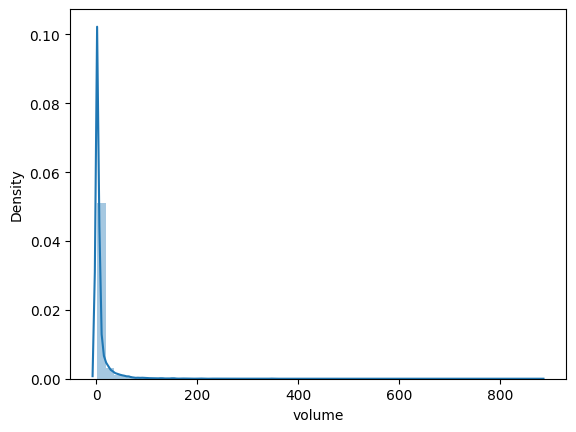

In [8]:
# DISTRIBUTION OF FEATURES

for j in num_feat:
    sns.distplot(df1[j])
    #plt.ylabel(j)
    plt.show()

In [9]:
cat_feat = [cname for cname in df1.columns if df1[cname].dtype == 'object']
cat_feat

['area_code',
 'transit_server_type',
 'log_report_type',
 'broadband_type',
 'outage_type']

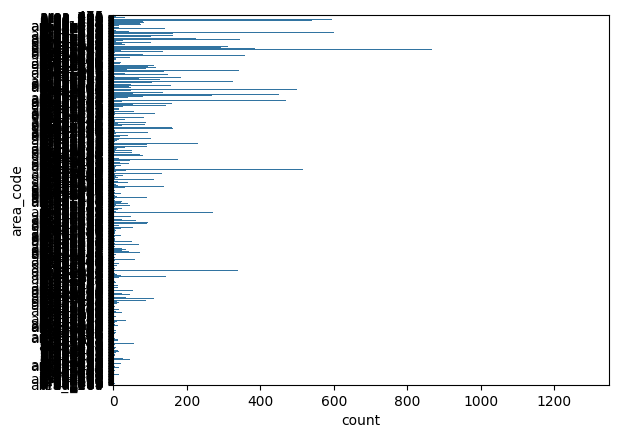

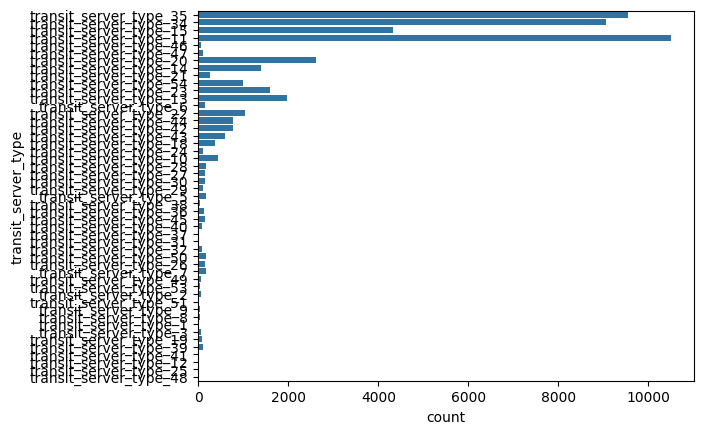

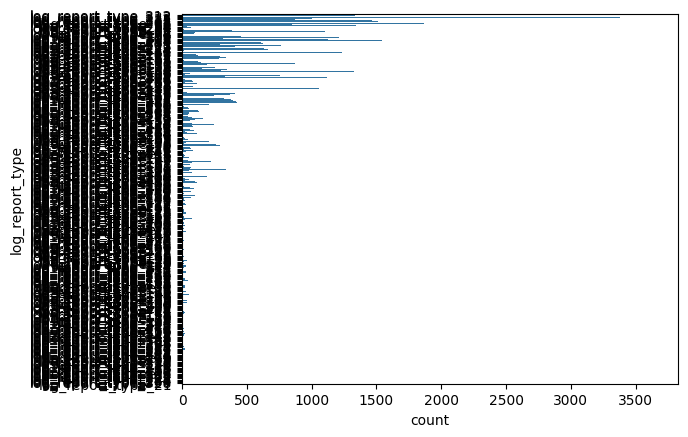

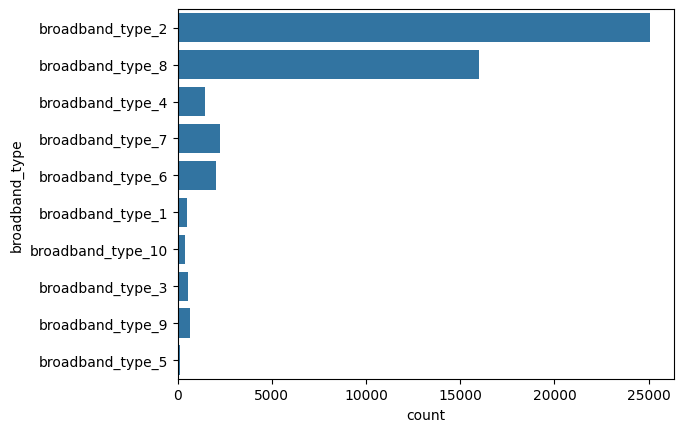

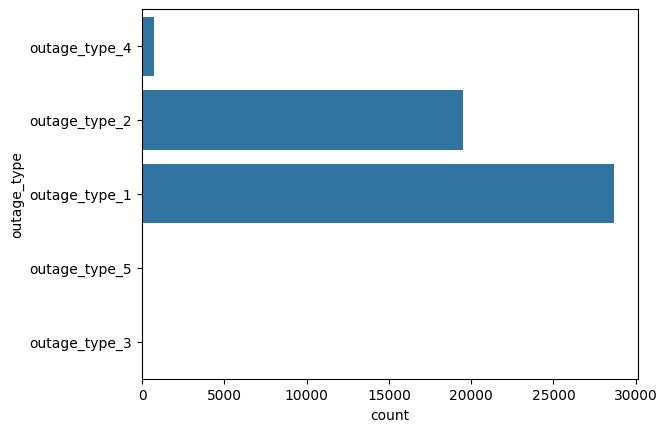

In [10]:
for i in cat_feat:
  sns.countplot(df1[i])
  plt.show()

In [11]:
#CALC IMBALANCE
def imbalance(data):
  placed0 = len(df1.loc[df1['outage_duration'] == 0])
  placed1 = len(df1.loc[df1['outage_duration'] == 1])
  not_placed = len(df1.loc[df1['outage_duration'] == 2])
  total = len(df1)
  a = (placed0 / total) * 100
  b = (placed1 / total) * 100
  c = (not_placed / total) * 100

  return a, b, c

x, y, z = imbalance(df1)
print(x, y, z)

59.92485655361117 26.161354215588183 13.913789230800644


ASSIGNEMNT QUESTIONS

In [12]:
# Calculate the average outage duration for each area
area_outage_duration = df.groupby('area_code')['outage_duration'].mean().reset_index()

# Calculate the average outage duration for each broadband type
broadband_outage_duration = df.groupby('broadband_type')['outage_duration'].mean().reset_index()

# Sort the areas and broadband types by average outage duration
area_outage_duration_sorted = area_outage_duration.sort_values(by='outage_duration', ascending=False)
broadband_outage_duration_sorted = broadband_outage_duration.sort_values(by='outage_duration', ascending=False)

# Display the top areas and broadband types prone to long outage durations
print("Areas most prone to long outage durations:")
print(area_outage_duration_sorted.head(13))

print("\nBroadband types suspect of long outage durations:")
print(broadband_outage_duration_sorted.head(3))

Areas most prone to long outage durations:
    area_code  outage_duration
842  area_956              2.0
596  area_674              2.0
576   area_65              2.0
817  area_926              2.0
494  area_540              2.0
737  area_840              2.0
503  area_551              2.0
504  area_555              2.0
759  area_867              2.0
758  area_866              2.0
870  area_991              2.0
508  area_559              2.0
676  area_774              2.0

Broadband types suspect of long outage durations:
     broadband_type  outage_duration
5  broadband_type_5         2.000000
0  broadband_type_1         1.168399
3  broadband_type_3         0.959002


In [13]:
import dtale
dtale.show(df)
